In [1]:
#imports
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
import pandas as pd
import numpy as np

a) lets get some data in and add the mpg01 var

In [2]:
auto_data= pd.read_csv(r"C:\Users\smtrp\OneDrive\Desktop\DS502\ISLR\Data_Sets\Auto.csv")

In [3]:
auto_data.describe

<bound method NDFrame.describe of       mpg  cylinders  displacement horsepower  weight  acceleration  year  \
0    18.0          8         307.0        130    3504          12.0    70   
1    15.0          8         350.0        165    3693          11.5    70   
2    18.0          8         318.0        150    3436          11.0    70   
3    16.0          8         304.0        150    3433          12.0    70   
4    17.0          8         302.0        140    3449          10.5    70   
..    ...        ...           ...        ...     ...           ...   ...   
392  27.0          4         140.0         86    2790          15.6    82   
393  44.0          4          97.0         52    2130          24.6    82   
394  32.0          4         135.0         84    2295          11.6    82   
395  28.0          4         120.0         79    2625          18.6    82   
396  31.0          4         119.0         82    2720          19.4    82   

     origin                       name  


In [4]:
median= auto_data.median()
print(median)

mpg               23.0
cylinders          4.0
displacement     146.0
weight          2800.0
acceleration      15.5
year              76.0
origin             1.0
dtype: float64


C:\Users\smtrp\AppData\Local\Temp\ipykernel_17268\1196109046.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  median= auto_data.median()


In [5]:
median.mpg

23.0

In [6]:
#Lets create the new column in the dataframe
auto_data['mpg01']=0
auto_data
#test_list = auto_data.loc[auto_data['mpg']>median.mpg]
#print(test_list)
auto_data.loc[auto_data['mpg']>median.mpg,['mpg01']]=1
auto_data

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name,mpg01
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu,0
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320,0
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite,0
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst,0
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino,0
...,...,...,...,...,...,...,...,...,...,...
392,27.0,4,140.0,86,2790,15.6,82,1,ford mustang gl,1
393,44.0,4,97.0,52,2130,24.6,82,2,vw pickup,1
394,32.0,4,135.0,84,2295,11.6,82,1,dodge rampage,1
395,28.0,4,120.0,79,2625,18.6,82,1,ford ranger,1


b) lets explore if there are any obvious trends in the data. As the mpg01 data is a direct function of the mpg data, I am going to try something first. I am going to see if there are any obvious associations between the mpg data and all other data formats. Lets check that first.

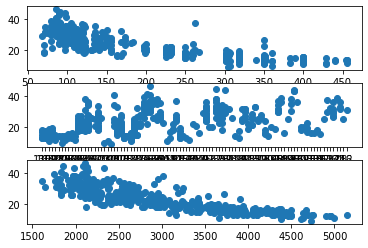

In [7]:
fig, (ax1, ax2, ax3) = plt.subplots(3,1)

ax1.scatter(auto_data.displacement,auto_data.mpg)
ax2.scatter(auto_data.horsepower,auto_data.mpg)

ax3.scatter(auto_data.weight,auto_data.mpg)

plt.show()

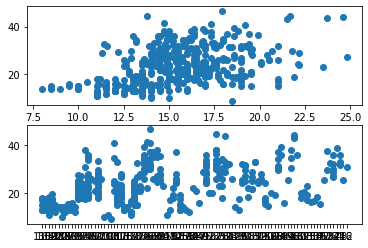

In [8]:
fig, (ax4,ax5) = plt.subplots(2,1)
ax4.scatter(auto_data.acceleration,auto_data.mpg)
ax5.scatter(auto_data.horsepower, auto_data.mpg)

Okay, so some apparantly strong correlations there, especially with displacement, weight and acceleration. Which is cool. I also want to see if mg01 has anything to do with cylinders.

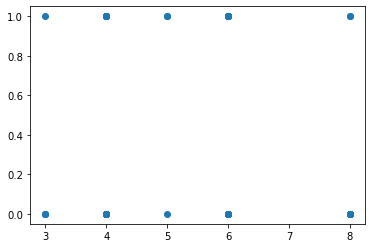

In [9]:
plt.scatter(auto_data.cylinders, auto_data.mpg01)

No obvious correlation. Moving on with the aforementioned variables.

In [10]:
#preparing the data
from sklearn.model_selection import train_test_split
x_data = auto_data.loc[:,'weight'].array.reshape(-1,1)
y_data = auto_data.mpg01
x_train, x_test, y_train, y_test = train_test_split(x_data,y_data, test_size=0.20)
print(len(x_train))
print(len(y_train))
#x_train


317
317


In [11]:
# Finally, Linear Discriminanat Analysis
ld_model = LinearDiscriminantAnalysis()
ld_fit= ld_model.fit(x_train,y_train)


In [12]:
# QDA
qda_model = QuadraticDiscriminantAnalysis()
qda_fit= qda_model.fit(x_train,y_train)


In [13]:
# KNN with n = 5
knn_model = KNeighborsClassifier(n_neighbors = 5)
knn_fit = knn_model.fit(x_train, y_train)

In [14]:
# lets compare the results
from sklearn.metrics import accuracy_score

my_dict = {0:ld_fit,1:qda_fit,2:knn_fit}
accuracy_list = []
test_error_list = []
for i in (list(range(3))):
    accuracy_list.append(accuracy_score(y_test, my_dict[i].predict(x_test)))
    test_error_list.append(round(1-accuracy_list[i],2))
print(accuracy_list)
print(test_error_list)

[0.9375, 0.95, 0.85]
[0.06, 0.05, 0.15]


That seems rather fantastic. And I am going to say that my initial prediction was pretty spot on.
The only week link seems to be knn. Can I fix that? Lets find out

In [15]:
# KNN iteration 1 - 10
knn_iteration_list = []
print(list(range(10)))
knn_accuracy_list = []
for i in list(range(10)):
    knn_model = KNeighborsClassifier(n_neighbors = i+1)
    knn_fit = knn_model.fit(x_train, y_train)
    knn_accuracy_list.append(accuracy_score(y_test,knn_fit.predict(x_test)))
print(knn_accuracy_list)
print("Best number of neighbors is: ", np.argmax(knn_accuracy_list)+1)


[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
[0.7875, 0.7625, 0.825, 0.8, 0.85, 0.85, 0.8375, 0.8375, 0.8625, 0.8625]
Best number of neighbors is:  9
